In [213]:
import pandas as pd 

url = "https://raw.githubusercontent.com/deslum/learning-by-playing/master/ML/australian_beer.csv"
df=pd.read_csv(url)

df.tail()




,Month,Mlitres
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


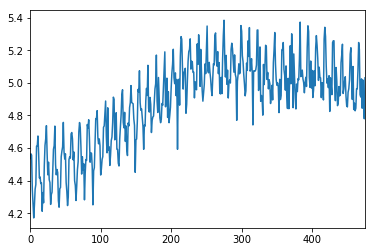

In [214]:
import matplotlib.pyplot as plt
import numpy as np

df['log_Mlitres'] = np.log(df['Mlitres'])

df['log_Mlitres'].plot(legend=False)

In [215]:
df.tail()

,Month,Mlitres,log_Mlitres
471,1995-04,127.0,4.844187
472,1995-05,151.0,5.017280
473,1995-06,130.0,4.867534
474,1995-07,119.0,4.779123
475,1995-08,153.0,5.030438


In [216]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
new_dates = pd.date_range('1956-01-01', '1995-08-01', freq='MS')
new_dates = pd.Index(df['Month']) | new_dates
df2 = pd.DataFrame({'Month': new_dates})
df = pd.merge(df, df2, on='Month', how='right')
df.head()

,Month,Mlitres,log_Mlitres
0,1956-01-01,93.2,4.534748
1,1956-02-01,96.0,4.564348
2,1956-03-01,95.2,4.555980
3,1956-04-01,77.1,4.345103
4,1956-05-01,70.9,4.261270


In [217]:
from sklearn.linear_model import LinearRegression


df['MonthNum'] = range(1, len(df) + 1)
df['MonthSQR'] = df['MonthNum'] * df['MonthNum']
df['MonthSQR_3'] = df['MonthNum'] * df['MonthNum'] * df['MonthNum']

y = np.log(df['Mlitres'])

for x in range(1, 13):
    df['season_' + str(x)] = df['Month'].dt.month == x

season_columns = ['season_' + str(x) for x in range(2, 13)]

X = df[['MonthNum'] + ['MonthSQR'] + season_columns]
y = df['log_Mlitres']


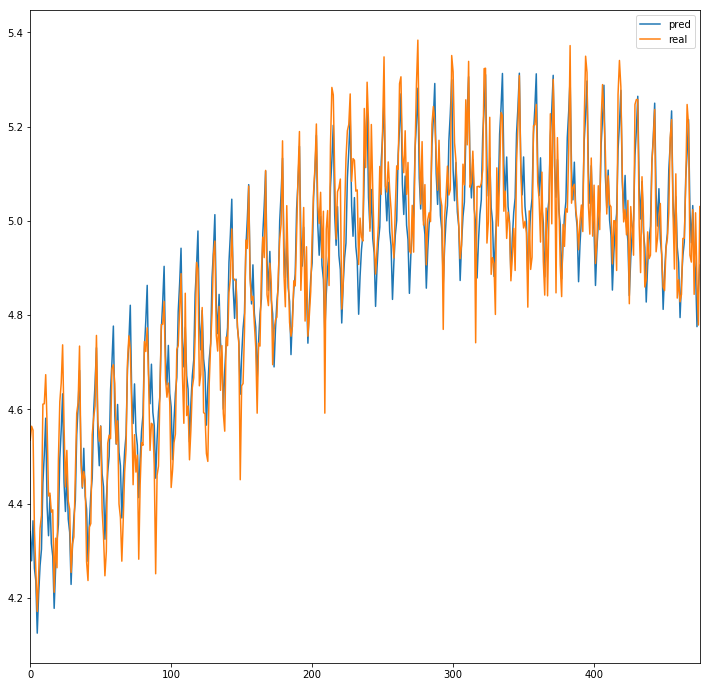

In [219]:
model = LinearRegression()
model.fit(X, y)


pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot(figsize=(12, 12))